# Import dependencies

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import os,sys

# Keypoints using MP Holistic

### Definitions

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(43,180,255), thickness = 1,circle_radius=2),
                             mp_drawing.DrawingSpec(color=(255,0,255), thickness = 1,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(43,180,255), thickness = 2,circle_radius=3),
                             mp_drawing.DrawingSpec(color=(255,0,255), thickness = 3,circle_radius=3)
                             )
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(43,180,255), thickness = 2,circle_radius=3),
                             mp_drawing.DrawingSpec(color=(255,0,255), thickness = 2,circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(43,180,255), thickness = 2,circle_radius=3),
                             mp_drawing.DrawingSpec(color=(255,0,255), thickness = 2,circle_radius=1)
                             )

### Detecting from an image

In [6]:
#Enter picture input/ file path
rawpic = os.path.join("Guardian Demon 18.png")

#convert to a numpy array
pic = cv2.imread(rawpic)

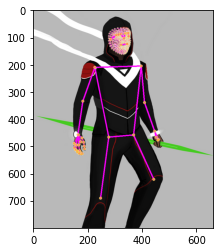

In [7]:
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #make detections
    picpr, results = mediapipe_detection(pic, holistic)
    
    #draw landmarks
    #draw_landmarks(image, results)
    draw_styled_landmarks(picpr, results)
    
    #display image
    plt.imshow(cv2.cvtColor(picpr, cv2.COLOR_BGR2RGB))
    plt.show()

In [9]:
#Save output as jpeg
cv2.imwrite("out.jpg", picpr)

True

### Detecting from Webcam

### Overlayed

In [7]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read frame
        ret, frame = cap.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)
               
        #draw landmarks
        #draw_landmarks(image, results)
        draw_styled_landmarks(image, results)

        #show to screen
        cv2.imshow('OpenCV Feed', image)
        
        #break gracefully
        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

### Black background

In [9]:
#First large number is the number of pixels in the columns or width
frame1 = np.full((640,3),0)
# the *160 is the number of pixels in the rows/ height divided by 3
frame2 = np.array([frame1,frame1,frame1]*160,dtype=np.uint8)

cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read frame
        ret, frame = cap.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)
        
        #style stuff, change frame2 to image from draw landmarks below for overlayed output
        frame2 = np.array([frame1,frame1,frame1]*160,dtype=np.uint8)
               
        #draw landmarks
        #draw_landmarks(image, results)
        draw_styled_landmarks(frame2, results)

        #show to screen
        cv2.imshow('OpenCV Feed', frame2)
        
        #break gracefully
        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

## Detecting from a video

In [10]:
#Enter video input/ file path
video = "Hip Hop 2020 Video Mix (NEW HITS) - R&B 2020 - Dancehall (RAP, TRAP, HIPHOP, DRAKE, CARDI B, DABABY).mkv_20220218_174621.mp4"

### Overlayed

In [11]:
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #Establish capture
    cap = cv2.VideoCapture(os.path.join(video))
    
    #Setup Video writer
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    #Videowriter
    video_writer = cv2.VideoWriter(os.path.join('output3.mp4'), cv2.VideoWriter_fourcc('M','P','4','2'), fps, (width, height))
    
    # Loop through each frame
    for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        #read frame
        ret, frame = cap.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)

        #draw landmarks
        #draw_landmarks(image, results)
        draw_styled_landmarks(image, results)

        #show to screen
        cv2.imshow('OpenCV Feed', image)
        
        #Write out frame
        #video_writer.write(image)

        #Breaking the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    #close down everything
    cap.release()
    cv2.destroyAllWindows()
    video_writer.release()

### Black Background

In [12]:
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #Establish capture
    cap = cv2.VideoCapture(os.path.join(video))
    
    #Setup Video writer
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    frame1 = np.full((width,3),0)
        
    #Videowriter
    video_writer = cv2.VideoWriter(os.path.join('output6.mp4'), cv2.VideoWriter_fourcc('M','P','4','2'), fps, (width, height))
    
    # Loop through each frame
    for frame_idx in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        #read frame
        ret, frame = cap.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)
        
        frame2 = np.array([frame1,frame1,frame1]*int(height/3),dtype=np.uint8)

        #draw landmarks
        #draw_landmarks(image, results)
        draw_styled_landmarks(frame2, results)

        #show to screen
        cv2.imshow('OpenCV Feed', frame2)
        
        #Write out frame
        video_writer.write(frame2)

        #Breaking the loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    #close down everything
    cap.release()
    cv2.destroyAllWindows()
    video_writer.release()

## Extracting keypoint values

In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh =np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

## Setup Folders for Collection

In [9]:
#Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_DATA')

#Actions that we are trying to deetect
actions = np.array(['hello', 'thanks', 'iloveyou'])

#Thirty videos worth of data
no_sequences = 30

#videos are going to be 30 frames in length
sequence_length = 30

In [10]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
                pass

## Collect Keypoint Values for Training and Testing

In [98]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    #loop through actions
    for action in actions:
        #loop through videos
        for sequence in range(no_sequences):
            #loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                #read frame
                ret, frame = cap.read()

                #make detections
                image, results = mediapipe_detection(frame, holistic)

                #draw landmarks
                #draw_landmarks(image, results)
                draw_styled_landmarks(image, results)
                
                #apply wait logic
                if frame_num == 0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4,cv2.LINE_AA)
                    cv2.putText(image,'Collecting frames for {} Video Number{}'.format(action, sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1,cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'Collecting frames for {} Video Number{}'.format(action, sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1,cv2.LINE_AA)
                    
                #Emport keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence),str(frame_num))
                np.save(npy_path, keypoints)

                #show to screen
                cv2.imshow('OpenCV Feed', image)

                #break gracefully
                if cv2.waitKey(10) & 0xFF ==ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

## Preprocess Data and Create Labels and Features

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [12]:
label_map = {label:num for num, label in enumerate(actions)}

In [19]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [20]:
X = np.array(sequences)

In [21]:
y = to_categorical(labels).astype(int)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

## Build and Train LSTM Neural Network

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [24]:
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir)

In [25]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [26]:
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [20]:
model.fit(X_train, y_train, epochs = 1000, callbacks = [tb_callback])

Epoch 1/1000
3/3 [==============================] - 6s 241ms/step - loss: 1.0829 - categorical_accuracy: 0.3529
Epoch 2/1000
3/3 [==============================] - 0s 133ms/step - loss: 3.0232 - categorical_accuracy: 0.3294
Epoch 3/1000
3/3 [==============================] - 0s 136ms/step - loss: 1.1333 - categorical_accuracy: 0.3529
Epoch 4/1000
3/3 [==============================] - 0s 143ms/step - loss: 1.1619 - categorical_accuracy: 0.3059
Epoch 5/1000
3/3 [==============================] - 0s 141ms/step - loss: 1.6982 - categorical_accuracy: 0.3765
Epoch 6/1000
3/3 [==============================] - 0s 150ms/step - loss: 1.0707 - categorical_accuracy: 0.4471
Epoch 7/1000
3/3 [==============================] - 0s 162ms/step - loss: 0.9930 - categorical_accuracy: 0.4588
Epoch 8/1000
3/3 [==============================] - 0s 153ms/step - loss: 0.8866 - categorical_accuracy: 0.5412
Epoch 9/1000
3/3 [==============================] - 0s 186ms/step - loss: 1.3611 - categorical_accuracy:

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

## Make predictons

In [27]:
res = model.predict(X_test)

In [28]:
actions[np.argmax(res[3])]

'iloveyou'

In [29]:
actions[np.argmax(y_test[3])]

'thanks'

## Save Weights

In [57]:
model.save('action.h5')

In [58]:
del model

In [30]:
model.load_weights('action.h5')

## Evaluation using confusion Matrix and Accuracy

In [31]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [32]:
yhat = model.predict(X_test)

In [33]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat =np.argmax(yhat, axis=1).tolist()

In [34]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [35]:
accuracy_score(ytrue, yhat)

1.0

## Test in Real Time

In [36]:
colors = [(245,117,16),(117,245,16),(16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100),90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0,85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [45]:
#New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read frame
        ret, frame = cap.read()

        #make detections
        image, results = mediapipe_detection(frame, holistic)
               
        #draw landmarks
        #draw_landmarks(image, results)
        draw_styled_landmarks(image, results)
        
        #Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

        #visualisation logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence)>0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])


                if len(sentence) > 5:
                    sentence = sentence[-5:]
                
                #Visualise probalilties
                image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640,40),(245,117,16), -1 )
        cv2.putText(image,  ' '.join(sentence), (3,30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        #show to screen
        cv2.imshow('OpenCV Feed', image)
        
        #break gracefully
        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

iloveyou
iloveyou
thanks
thanks
thanks
thanks
thanks
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
iloveyou
thanks
thanks
thanks
hello
hello
hello
hello
hello
